# DATA VISUALIZATION

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium

# The Growth of Global Cinema: A Historical Overview of Film Releases

It is undeniable that in the modern days movies are a solid part of everyone's life since one's childhood. Sometimes, even our life itself has been influenced by a movie, or maybe it has just changed our point of view in some topics. However, should we ask ourselves how have these movies evolved through time? It has been 137 years since the first ever motion picture was captured and a lot has changed! In this data visualization project, we would like to build the story of how movies releases evolved in time, from the first ever movie to our most recent days, and furthermore see how fans, actors, directors and even the movies themselves has been rated and awarded.

Our personal hypothesis is that the more we get close to our days, the higher the number of movies released is going to be. This is mainly due to how big the movie industry is today thanks to development and new technologies.

## How the Film Industry Grew Over 150 Years.
The history of cinema has spanned over a little more than 150 years, ever since the first videos created by showing a series of images rapidly one after the other. When filmmaking was "born", things like airplanes, radio broadcasting or the Internet hadn't even been invented, so it's hard to imagine how much time has passed.

In [204]:
movies_df = pd.read_csv('data_cleaned/movies_cleaned.csv')

In [205]:
movies_df['year_of_release'].describe()

count    849685.000000
mean       1998.522329
std          27.534861
min        1874.000000
25%        1986.000000
50%        2010.000000
75%        2019.000000
max        2031.000000
Name: year_of_release, dtype: float64

The 50% of the years finds itself in recent years, meaning the bigger part of the movies is from the modern days. Let's merge the years into **decades** in order to visualize the growth of the releases in each 10 years.

For consistency purposes, we opted to keep out of the visualization the movies released in the 2020s, since the decade is halfway to be over and the visualization would result in inconsistent visualizations.

In [206]:
decade_bins = list(range(1870, 2031, 10))
decade_labels = [f"{start}-{start+9}" for start in decade_bins[:-1]]

movies_df['decade'] = pd.cut(movies_df['year_of_release'], bins=decade_bins, labels=decade_labels)

num_of_movies_per_decade = movies_df.groupby('decade', observed=False).size().reset_index(name='num_of_movies')
num_of_movies_per_decade = num_of_movies_per_decade.loc[num_of_movies_per_decade['decade'] <= '2010-2019']

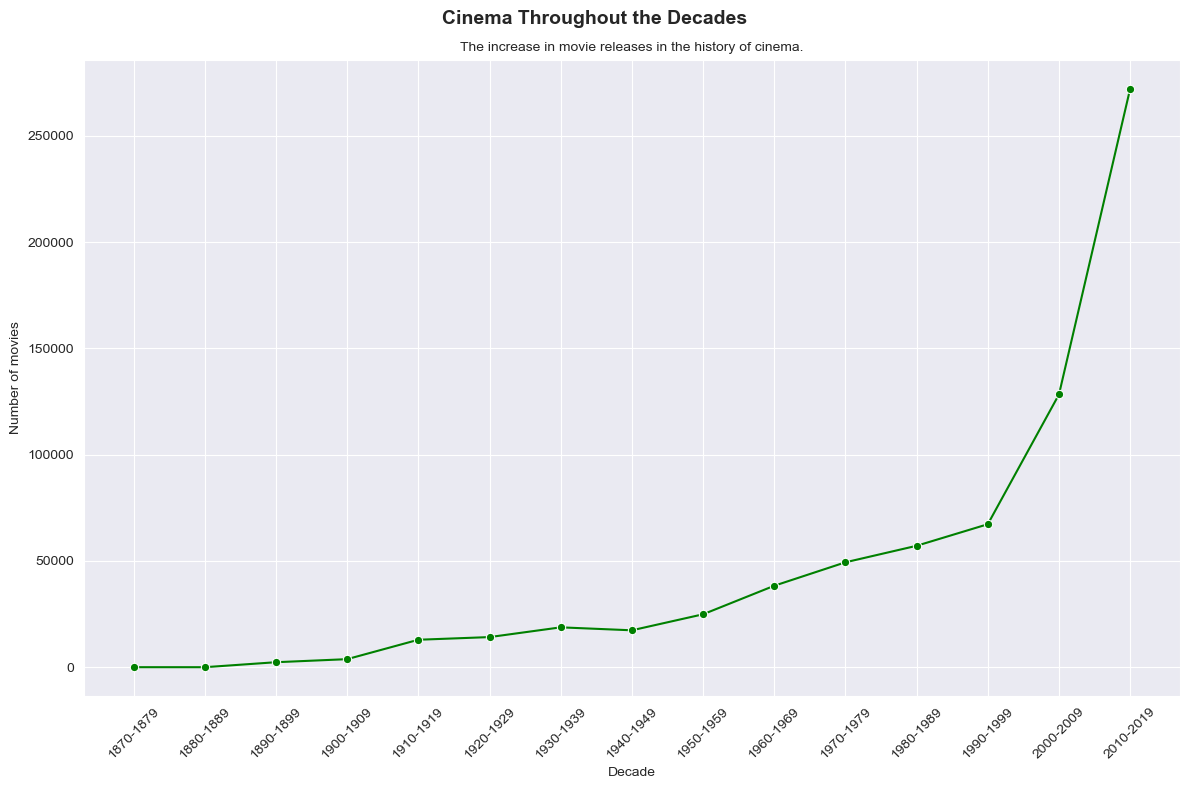

In [207]:
plt.figure(figsize = (12, 8))
sns.lineplot(x='decade', y='num_of_movies', data=num_of_movies_per_decade, marker='o', color='green')
plt.suptitle('Cinema Throughout the Decades', fontsize=14, fontweight='bold')
plt.title('The increase in movie releases in the history of cinema.', fontsize=10)
plt.xlabel('Decade')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## An Industry in Motion: Tracking the Boom in Movie Releases (1990–1999)
As expected, the number of movies exponentially increased in the history of cinema, especially in the latest 20 years, since almost **200000 movies** were released in these two decades. Furthermore, in the line-plot it is easily noticeable how big the number has grown specifically in the **1990s**. This shouldn't be surprising! The early 1990s were theater of a higher demand of movies, since the cinema was expanding really fast.

We can now watch closely inside of that decade, could it be that there's a specific year in which this increase happened?

In [208]:
movies_released_in_1990s = movies_df.query('year_of_release >= 1990 and year_of_release <= 1999')

grouped_movies_released_in_1990s = movies_released_in_1990s.groupby('year_of_release', observed=False).size().reset_index(name='num_of_movies')

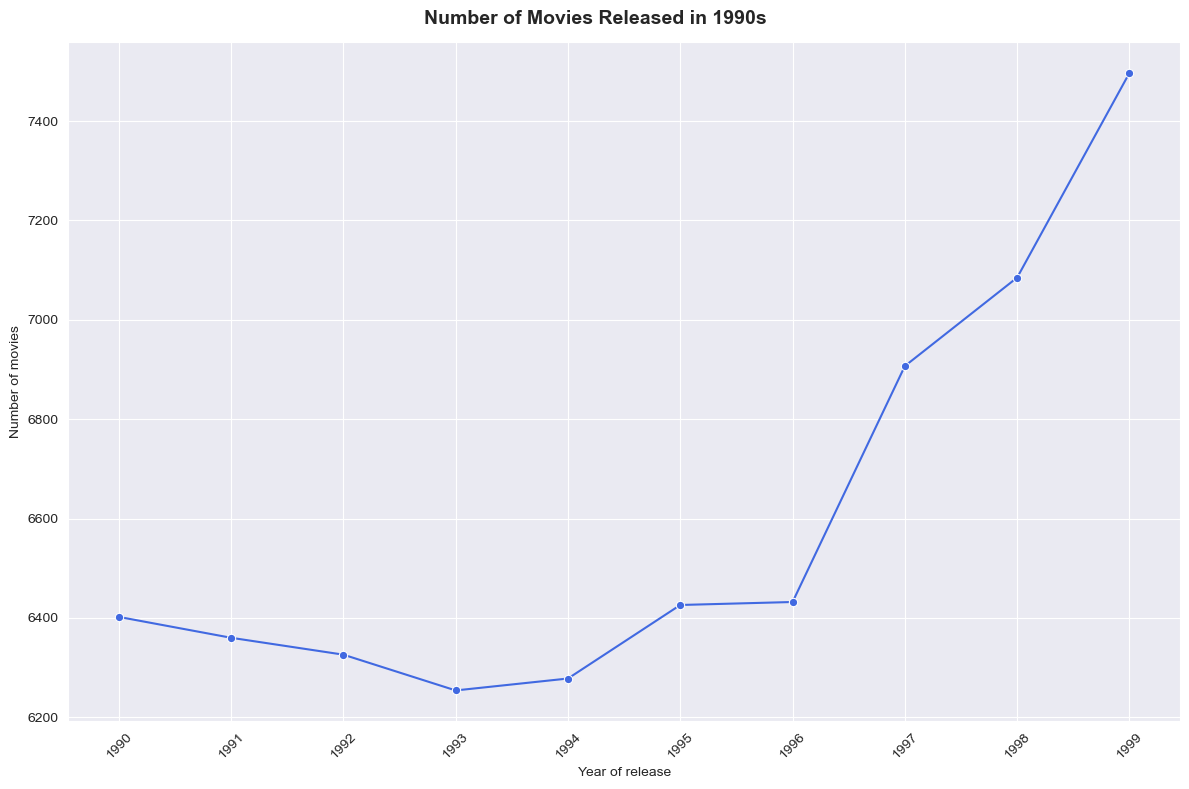

In [209]:
plt.figure(figsize = (12, 8))
sns.lineplot(x='year_of_release', y='num_of_movies', data=grouped_movies_released_in_1990s, marker='o', color='royalblue')
plt.suptitle('Number of Movies Released in 1990s', fontsize=14, fontweight='bold')
plt.xlabel('Year of release')
plt.ylabel('Number of movies')
plt.xticks(ticks=grouped_movies_released_in_1990s['year_of_release'], rotation=45)
plt.tight_layout()
plt.show()

As shown in the plot, there is a noticeable boom since 1996: compared to the previous years, over 500 more movies were released that year.

In fact, he 1990s marked a significant transition to **digital filmmaking**, with cheaper digital cameras and more accessible digital editing tools. This led to **lower production costs**, making it easier for **independent filmmakers** to create and release their works.

Additionally, 1996 marked the introduction of **DVD technology**, which boosted the demand for home video releases and encouraged studios to produce more films, and even witnessed the rise of the first **streaming services**, such as Netflix in 1997.

## 1996: Where Modern Cinema Begins?
As shown above, the introduction of DVD technology and the arrival of streaming services marked an important point in the history of cinema.

The question we are now asking ourselves is 'Has this evolution led to changes in the ways movies were released and distributed to the world?'. Surely, the development of new technologies must have given a sprint on how movies are released.

In [210]:
releases_df = pd.read_csv('data_cleaned/releases_cleaned.csv')

In [211]:
releases_df['date'] = pd.to_datetime(releases_df['date'], errors='coerce', format='%Y-%m-%d')
releases_df['year'] = releases_df['date'].dt.year

releases_df = releases_df[(releases_df['year'] >= 1996) & (releases_df['year'] < 2024)]

# extracting the three main type of movie releases of the dataset
digital_releases = releases_df.query('type == "Digital"')
theatrical_releases = releases_df.query('type == "Theatrical"')
physical_releases = releases_df.query('type == "Physical"')

grouped_theatrical_releases = theatrical_releases.groupby('year', observed=False).size().reset_index(name='count').query('count > 0')
grouped_digital_releases = digital_releases.groupby('year', observed=False).size().reset_index(name='count').query('count > 0')
grouped_physical_releases = physical_releases.groupby('year', observed=False).size().reset_index(name='count').query('count > 0')

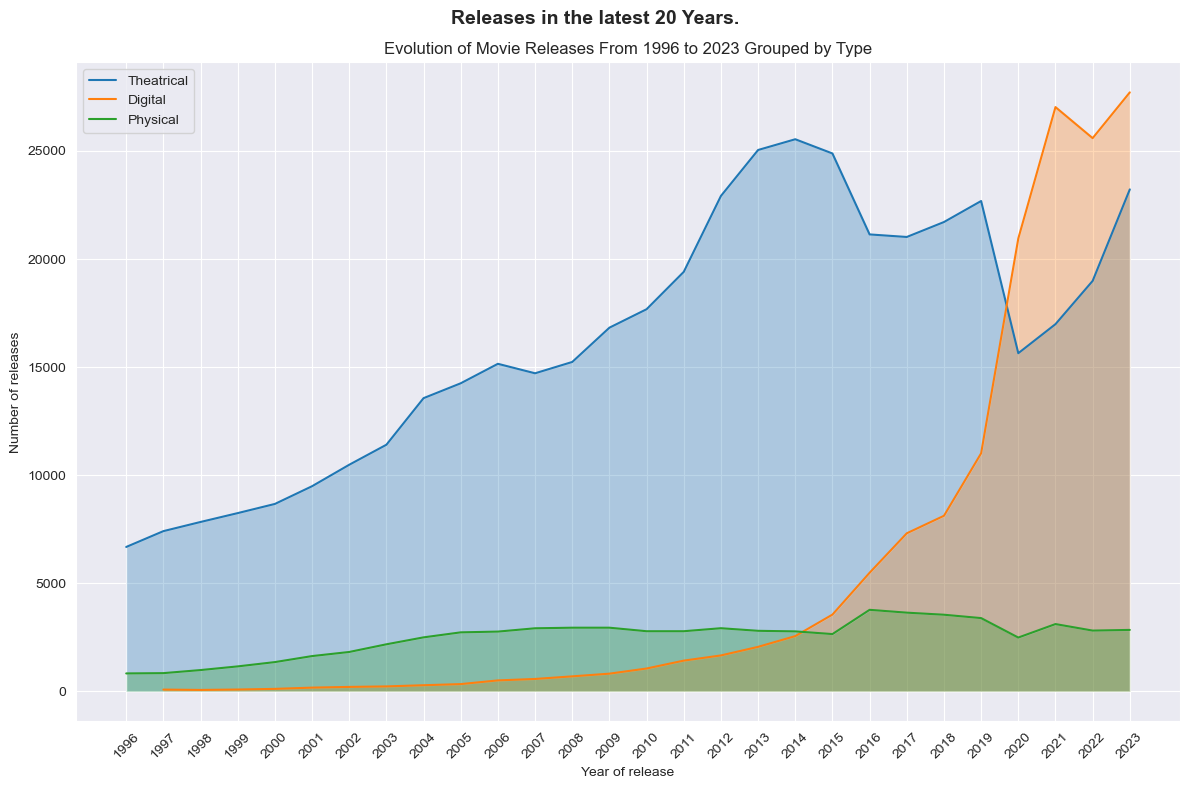

In [212]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=grouped_theatrical_releases, x="year", y="count", label="Theatrical")
plt.fill_between(grouped_theatrical_releases["year"], grouped_theatrical_releases["count"], alpha=0.3)

sns.lineplot(data=grouped_digital_releases, x="year", y="count", label="Digital")
plt.fill_between(grouped_digital_releases["year"], grouped_digital_releases["count"], alpha=0.3)

sns.lineplot(data=grouped_physical_releases, x='year', y='count', label='Physical')
plt.fill_between(grouped_physical_releases['year'], grouped_physical_releases['count'], alpha=0.3)

plt.suptitle("Releases in the latest 20 Years.", fontsize=14, fontweight='bold')
plt.title("Evolution of Movie Releases From 1996 to 2023 Grouped by Type")
plt.xlabel("Year of release")
plt.ylabel("Number of releases")
plt.xticks(ticks=grouped_theatrical_releases['year'], rotation=45)
plt.tight_layout()
plt.show()

As it appears in the plot, **theatrical releases were predominant** throughout the two decades. In the last few years though, theatrical releases have slowly faded into the background, overtaken by the rising wave of **digital distribution**.

The reason could be mainly hidden behind the rise of streaming services during the 2010s, which began to be available in many more countries! **Physical release**s always remain below a certain threshold (5000 in the plot), never advertising any peak or significant decrease/increase. We could speculate that this is also due to the rising of streaming services, since the digital releases used to be way more than the physical ones before the 2010s.

Then comes 2020, a dramatic plunge. The number of theatrical releases falls sharply, dropping to levels we hadn’t seen since 2005. It’s hard not to connect this sudden dip to the **COVID-19 pandemic**, the time when cinemas shut their doors and countless film premieres were either delayed or cancelled altogether.

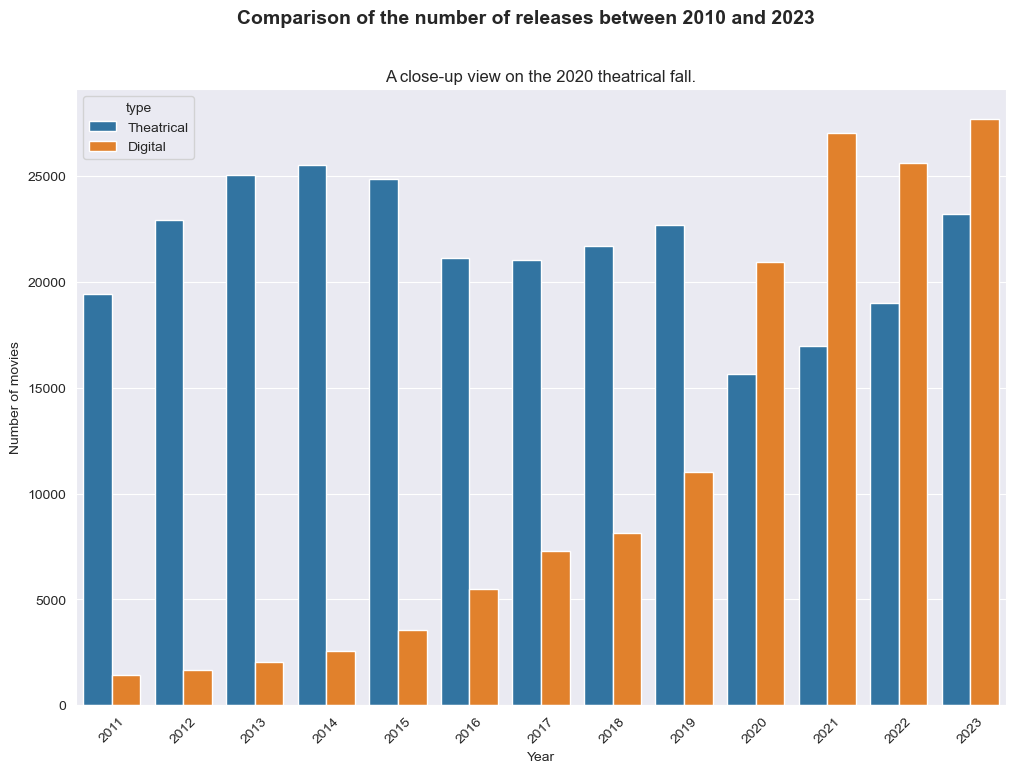

In [213]:
digital_and_theatrical = pd.concat([theatrical_releases, digital_releases])

plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='type', data=digital_and_theatrical.query('year > 2010'))
plt.title('A close-up view on the 2020 theatrical fall.', fontsize=12)
plt.suptitle('Comparison of the number of releases between 2010 and 2023', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.show()

In [214]:
grouped_theatrical_releases = None
grouped_digital_releases = None
grouped_physical_releases = None
physical_releases = None
digital_releases = None
theatrical_releases = None
movies_released_in_1990s = None
grouped_movies_released_in_1990s = None

# Genres Through the Lens of Time: Exploring Trends and Popularity of Genres in Movie History
After focusing on how the releases evolved in time, we could now focus on how this growth has influenced the variety of genres. One of the reasons why movies are so appreciated by everyone is because they provide every kind of peculiarity for every taste! The purpose of this sub-analysis is to tell the story and show how, why and which genres had an impact in the history of cinema, also highlighting how much they are liked (rated) by the public/journalism.

In [215]:
genres_df = pd.read_csv('data_cleaned/genres_cleaned.csv')

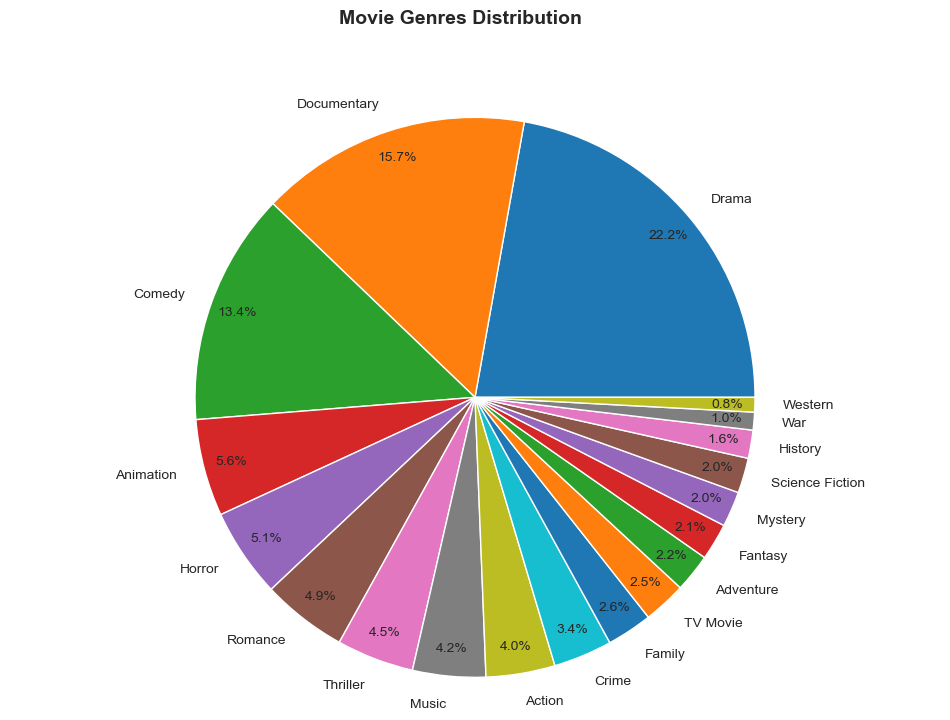

In [216]:
grouped_genres = genres_df.groupby('genre', observed=False).size().reset_index(name='num_of_movies')
grouped_genres = grouped_genres.sort_values(by='num_of_movies', ascending=False)

plt.figure(figsize=(12, 8))
plt.pie(grouped_genres['num_of_movies'], labels=grouped_genres['genre'], autopct='%1.1f%%', pctdistance=0.90)
plt.suptitle('Movie Genres Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

The pie chart highlights that there are:
- 3 dominant genres, Comedy, Drama and Documentary, representing basically 50% of the pie.
- 16 more niche genres, which fall down the other 50% of the pie.

Drama is the genre with the highest percentage of movies. This could be mainly because this genre can contain a lot of sub-genres, since 'Drama' usually determines how the movies is on a narrative level. Drama’s big presence in the pie chart might not mean movies are released only with 'Drama' as a genre, but that many genres inherit the dramatic tone and are so classified as such. We decided to still keep 'Drama' in the analysis.

Now we can try to tell the story of how these genres evolved in time ... Were those three dominant genres always the most relevant ones or in the history of cinema some of the more niche genres were the ones dominating the industry? Are the most prevalent genres also the ones with the highest ratings?

In [217]:
movies_and_genres_merged = genres_df.merge(movies_df, left_on='movie_id', right_on='movie_id', how='inner')
movies_and_genres_merged['decade'] = pd.cut(movies_and_genres_merged['year_of_release'], bins=decade_bins, labels=decade_labels)
grouped_genres_by_decade = movies_and_genres_merged.groupby(['decade', 'genre'], observed=False).size().reset_index(name='num_of_movies')

genres_per_decade_matrix = grouped_genres_by_decade.groupby(['genre', 'decade'], observed=False)['num_of_movies'].sum().unstack().fillna(0)
total_movies_per_decade = genres_per_decade_matrix.sum(axis=0)
genres_per_decade_percentage_matrix = genres_per_decade_matrix.div(total_movies_per_decade, axis=1) * 100

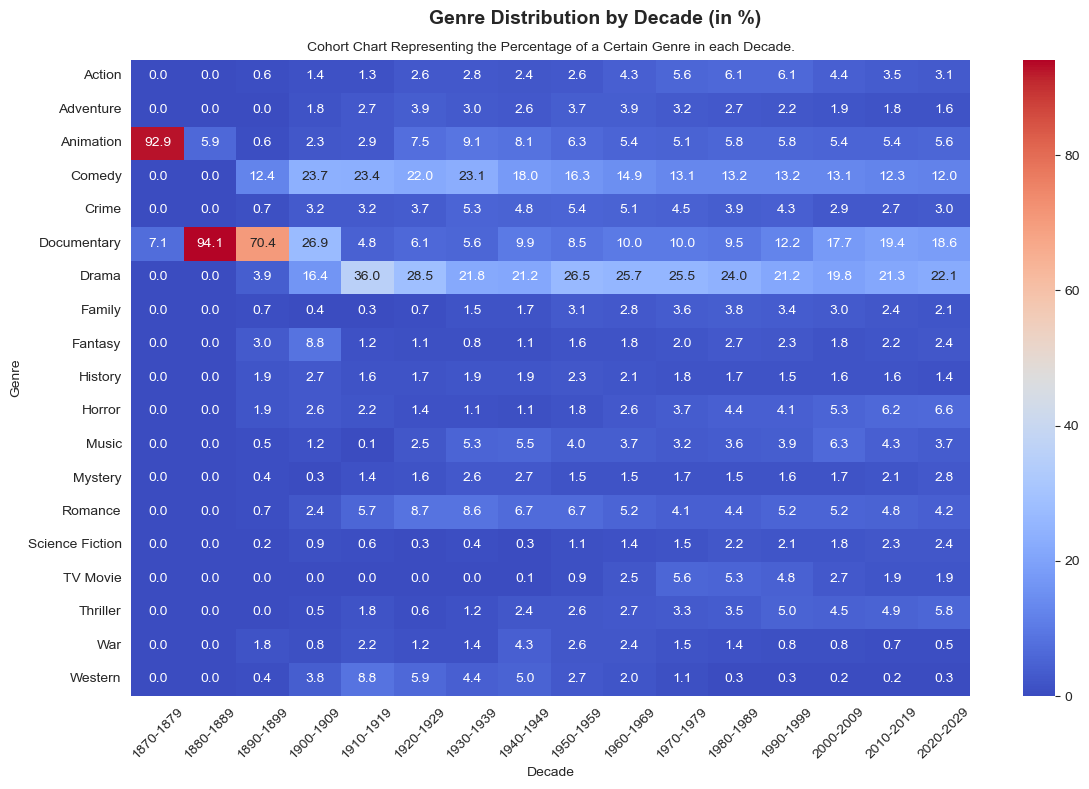

In [218]:
plt.figure(figsize=(12, 8))

sns.heatmap(genres_per_decade_percentage_matrix, cmap='coolwarm', annot=True, fmt='.1f')
plt.suptitle('Genre Distribution by Decade (in %)', fontsize=14, fontweight='bold')
plt.title('Cohort Chart Representing the Percentage of a Certain Genre in each Decade.', fontsize=10)
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the **early years of cinema** (1870s-1890s) the most predominant genre were documentary (**94.1%**) and animation (**92.9%**). The reason is, at the time filmmakers would usually capture real-life events or everyday-life activities due to the limitations of technology and costs; furthermore, the audience of the time was fascinated by any moving image ... simply witnessing everyday life in motion was a novelty. Moreover, there probably weren't enough movies to start a distinction. An animation device called praxinoscope was also invented at the time and the first early footage of animation was released. Probably the reason why it was overshadowed by documentaries it's because motion-picture cameras were invented and technology evolved.

**Comedy** starts to be more relevant at the beginning of the 20th century, witnessing the rise of stars like Charlie Chaplin and Buster Keaton, who popularized comedy that relied on visual gags and expressive acting. **Romance** and **Music** genres also become relevant during that period, probably due to the introduction of sound in the 1920s, which refined those genres making them much more fascinating and attractive, while the production of **Western** and **War** movies almost came to a halt in the last four decades. Other genres, such as **Thriller**, **Horror** and **TV Movie** are pretty much non-existent until late 20th century.



Now that we've got a deeper insight into how genres have evolved through time, we could ask ourselves how good these genres are usually rated in movies. Are the most predominant genres usually rated higher that the niche ones or there's no correlation between them and less present genres still receive good ratings? First, we should see how ratings are distributed in the

In [219]:
reviews_df = pd.read_csv('data_cleaned/reviews_cleaned.csv')
movies_genres_reviews_merged = movies_and_genres_merged.merge(reviews_df, left_on='movie_name', right_on='movie_title', how='inner')

movies_genres_reviews_merged = movies_genres_reviews_merged[['movie_name', 'genre', 'normalized_review_score', 'decade']]

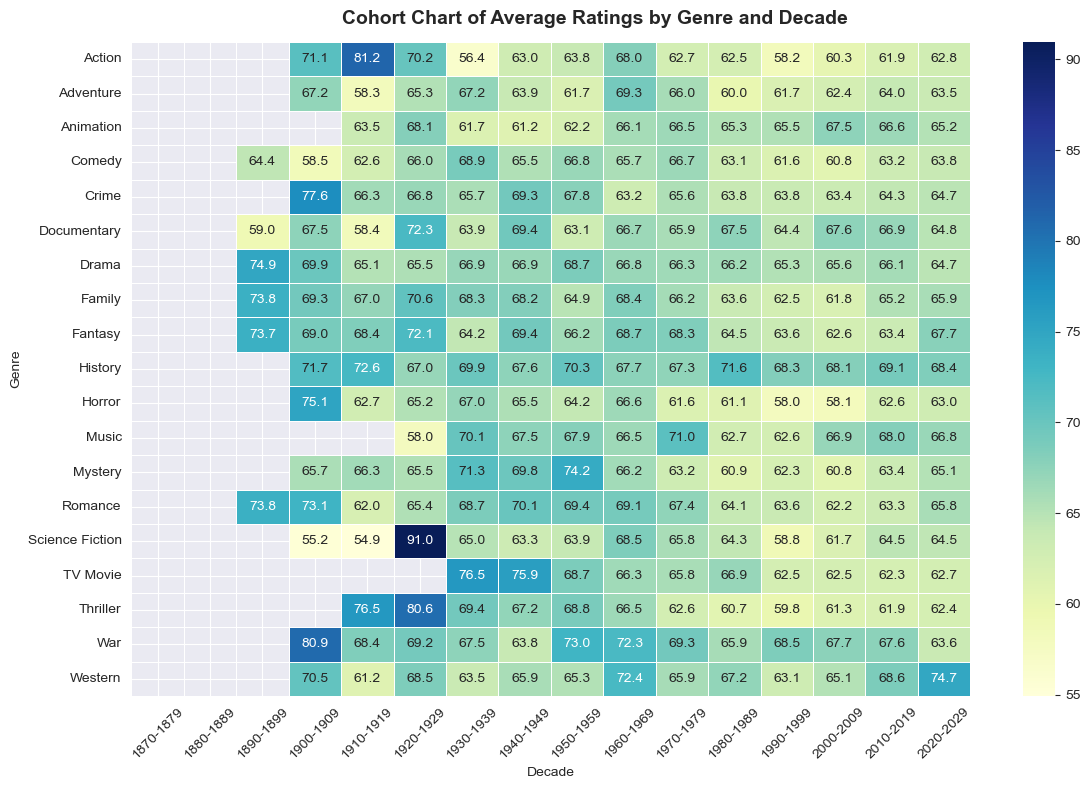

In [220]:
genre_rating_by_decade = movies_genres_reviews_merged.groupby(['genre', 'decade'], observed=False)['normalized_review_score'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(genre_rating_by_decade, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.suptitle("Cohort Chart of Average Ratings by Genre and Decade", fontsize=14, fontweight='bold')
plt.xlabel("Decade")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As shown in the heatmap, the older movies tend to have a higher mean rating, especially before the 1970s. This might be because of the higher quality movies used to have when it wasn't mainstream, leading to a stable mean rating percentage in the latest 40 years. Furthermore, the niche genres are not penalized, but sometimes have higher ratings than the mainstream ones.

In [221]:
distribution_of_ratings_per_genre = movies_genres_reviews_merged[~movies_genres_reviews_merged['decade'].isin(['1870-1879', '1880-1889'])]
distribution_of_ratings_per_genre['decade'] = distribution_of_ratings_per_genre['decade'].cat.remove_unused_categories()

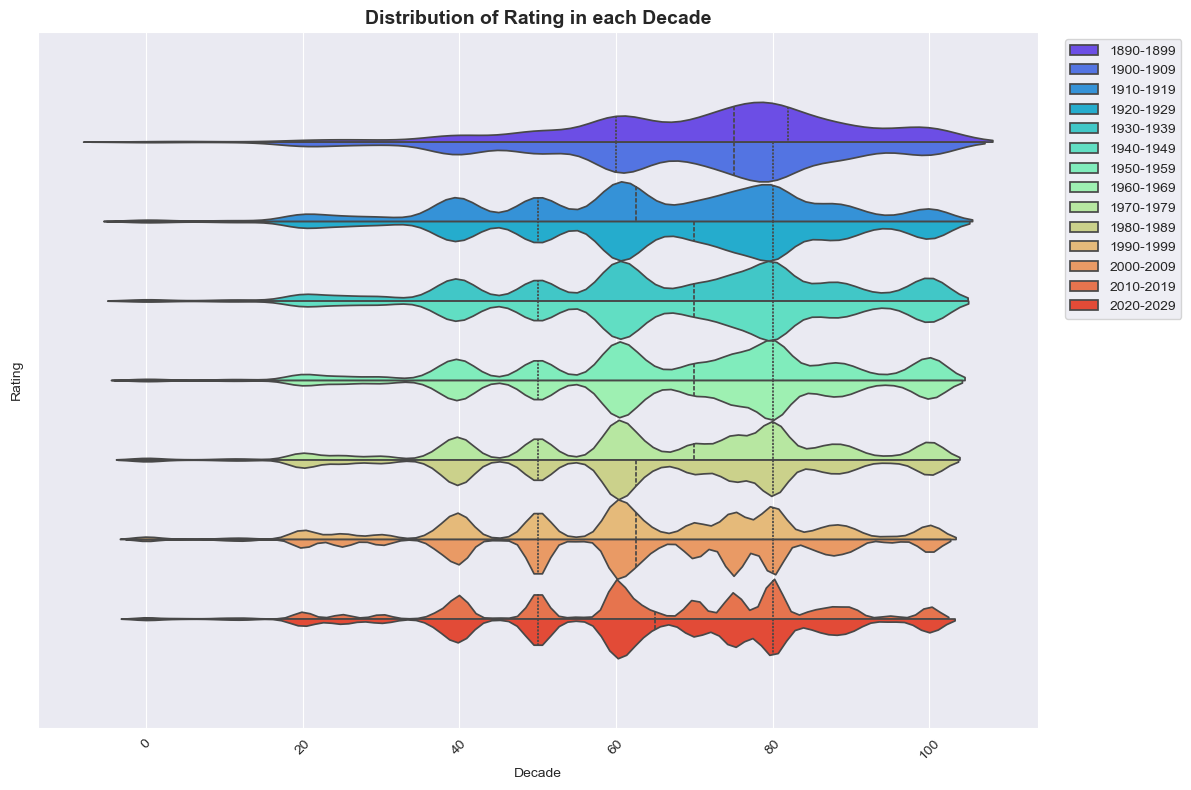

In [222]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    data=distribution_of_ratings_per_genre,
    hue='decade',
    x='normalized_review_score',
    split=True,
    inner='quartile',
    palette='rainbow'
)

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title('Distribution of Rating in each Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion: Are Popular Genres Better Rated?

Our initial hypothesis was that the most dominant genres over time (such as Drama, Comedy, and Documentary) would also be the highest rated. However, the data tells a slightly different story. Most genres, regardless of their prevalence, have average ratings that fall within a narrow range approximately between 2.8 and 3.7.

This suggests that **being widely produced does not necessarily imply higher quality or critical success**. In fact, some less represented genres (like History or Mystery) may go out just as well in terms of ratings.

Having explored the historical presence and audience reception of genres, we’re now ready to move beyond genres and investigate other aspects of film data.

Let’s now turn our attention to other factors that may shape the evolution and success of cinema: ....

# Lights, Camera... Triumph: Cracking the Code of Cinematic Success

**What truly defines a film’s success? Is it the number of Oscars it wins, or how much the audience loves it? Maybe it's a bit of both.**

In this section, we explored various dimensions of cinematic success using a dataset that covers films, reviews, awards, and more through data.
The goal? To spot the differences, the overlaps, and maybe even the surprises behind cinematic success.

To begin, we focused on film studios. We wanted to see which ones stood out the most when it came to success. But success can mean different things, right? So
we created two top-10 rankings: one based on Oscar wins and another using weighted review scores to ensure fairness (a single great review shouldn't distort the result).
By combining two graphs, it’s interesting to see which studios manage to strike that balance between awards and audience love—and which ones don’t.


In [223]:
studio_df = pd.read_csv('data_cleaned/studios_cleaned.csv')
movies_studio = movies_df.merge(studio_df, left_on='movie_id', right_on='movie_id', how='inner')

In [224]:
avg_reviews = reviews_df.groupby('movie_title')['normalized_review_score'].mean().reset_index()
avg_reviews.columns = ['movie_title', 'avg_rating']

In [225]:
oscar_awards_df = pd.read_csv('data_cleaned/oscar_awards_cleaned.csv')
oscars_won = oscar_awards_df[oscar_awards_df['winner'] == True].groupby('movie').size().reset_index(name='oscars_won')

In [226]:
movies_data = movies_studio.merge(avg_reviews, left_on='movie_name', right_on='movie_title', how='inner')
movies_data = movies_data.merge(oscars_won, left_on='movie_name', right_on='movie', how='inner')
movies_data['oscars_won'] = movies_data['oscars_won'].fillna(0)

In [227]:
studio_summary = movies_data.groupby('studio')[['movie_id', 'avg_rating', 'oscars_won']].agg({
    'movie_id': 'count',
    'avg_rating': 'mean',
    'oscars_won': 'sum'
}).reset_index()

studio_summary.columns = ['studio', 'num_movies', 'mean_rating', 'total_oscars']

This bar chart displays the top 10 film studios ranked by the total number of Oscars they have won. The chart highlights which studios have achieved the highest recognition from the Academy.


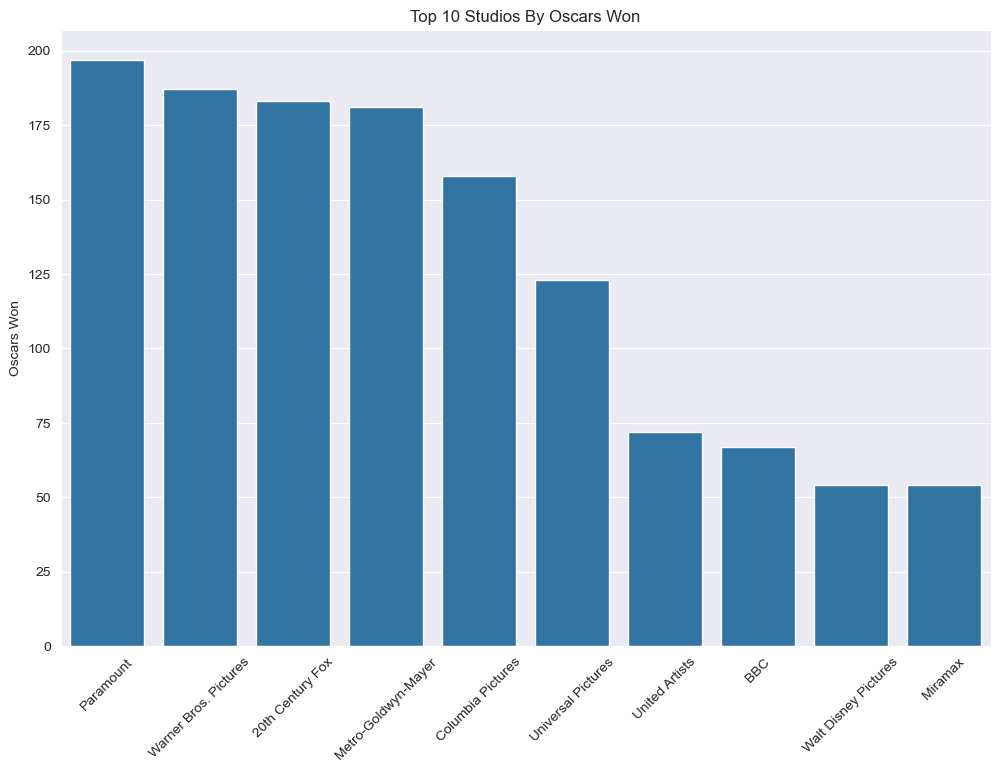

In [228]:
top_oscars = studio_summary.sort_values(by='total_oscars', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_oscars, x='studio', y='total_oscars')
plt.title('Top 10 Studios By Oscars Won')
plt.ylabel('Oscars Won')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()


In [229]:
studio_summary['weighted_rating'] = (studio_summary['mean_rating'] * studio_summary['num_movies'] / studio_summary['num_movies'].max())

This bar chart shows the top 10 film studios based on their weighted average rating. This approach prevents studios with only one or very few highly positive reviews — or only a single film — from ranking disproportionately high. By weighting ratings according to the volume of reviews, this visualization provides a more balanced and reliable comparison of overall studio performance in terms of audience and critic reception.


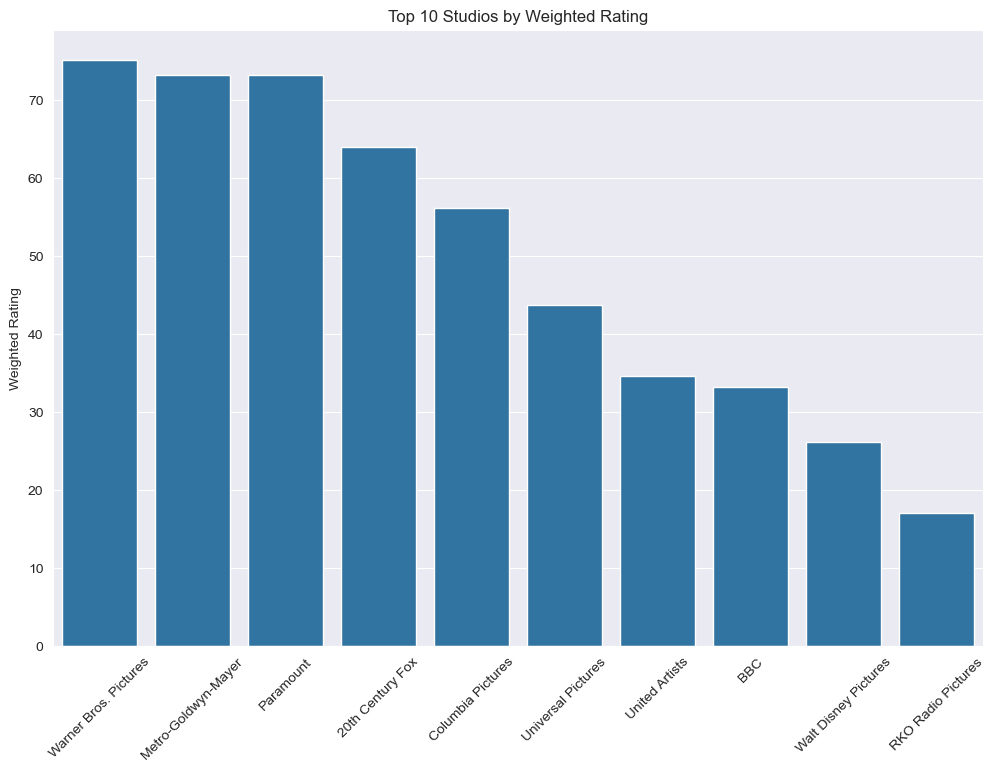

In [230]:
top_weighted_rated = studio_summary.sort_values(by='weighted_rating', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_weighted_rated, x='studio', y='weighted_rating')
plt.title('Top 10 Studios by Weighted Rating')
plt.ylabel('Weighted Rating')
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()


This area chart compares the top 10 studios in terms of Oscars won and weighted ratings, with both metrics normalized for easier comparison. Normalization scales the values between 0 and 1, allowing two different metrics — awards (total Oscars) and reception (weighted ratings) — to be plotted on the same scale. This visualization helps identify studios that not only win the most Oscars but also produce consistently well-reviewed films.

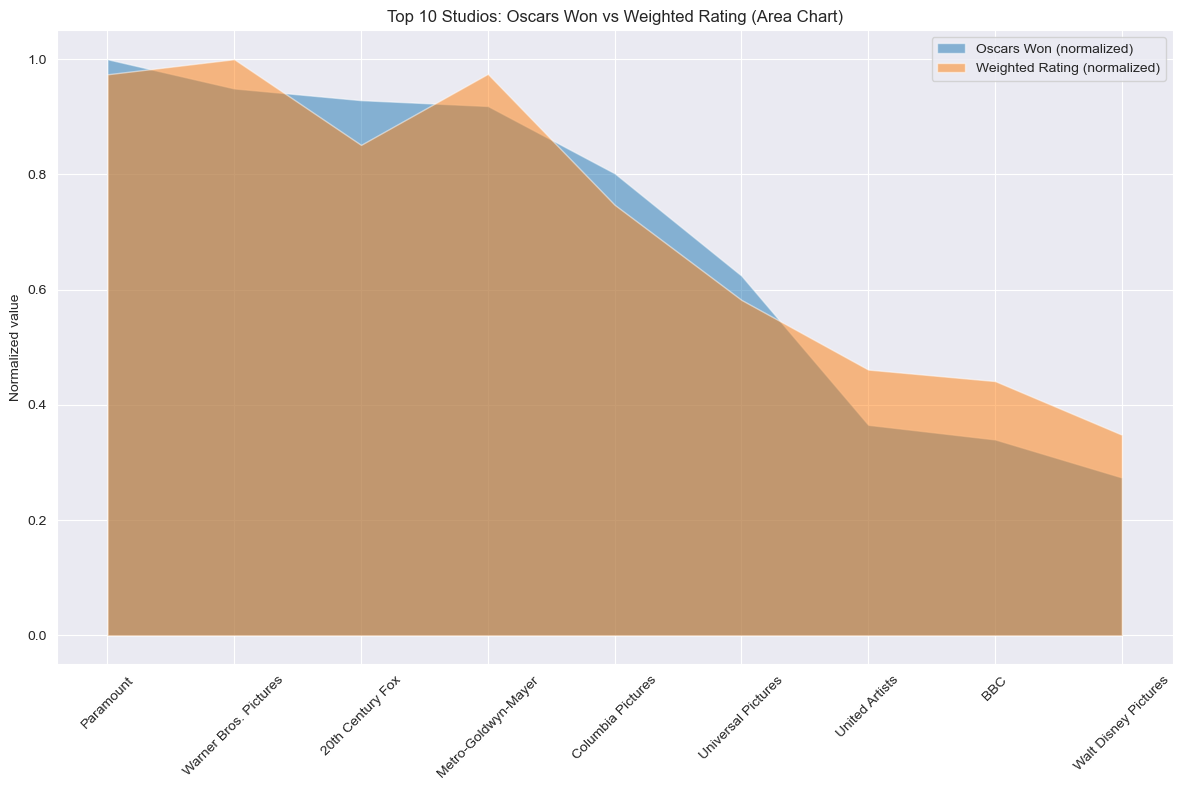

In [231]:
comparison_df = top_oscars.merge(top_weighted_rated[['studio', 'weighted_rating']], on='studio')

comparison_df = comparison_df.sort_values(by='total_oscars', ascending=False).reset_index(drop=True)

x = np.arange(len(comparison_df))

comparison_df['norm_oscars'] = comparison_df['total_oscars'] / comparison_df['total_oscars'].max()
comparison_df['norm_weighted'] = comparison_df['weighted_rating'] / comparison_df['weighted_rating'].max()

plt.figure(figsize=(12, 8))

plt.fill_between(x, comparison_df['norm_oscars'], alpha=0.5, label='Oscars Won (normalized)')

plt.fill_between(x, comparison_df['norm_weighted'], alpha=0.5, label='Weighted Rating (normalized)')

plt.xticks(x, comparison_df['studio'], rotation=45)
plt.ylabel('Normalized value')
plt.title('Top 10 Studios: Oscars Won vs Weighted Rating (Area Chart)')
plt.legend()
plt.tight_layout()
plt.show()

## Who are the most acclaimed directors?
**Behind every great film is a great director.** But what makes a director "great"? Is it the number of golden statuettes adorning their shelf? Or perhaps it's the way critics receive their works?

In this section, we examined directors from multiple perspectives, comparing those awarded the most Oscars with those receiving the highest review scores.
Additionally, we have created a measure that balances both the quality and quantity of a director's work.

This allows us to see who manages to obtain prestigious awards and who instead wins the hearts of critics and audiences, revealing interesting differences between commercial and artistic success in the world of film directing.

In [232]:
crew_df = pd.read_csv('data_cleaned/crew_cleaned.csv')

In [233]:
directors = crew_df[crew_df['role'].str.lower() == 'director']

In [234]:
directors = directors.merge(movies_df, on='movie_id', how='inner')
directors['title_clean'] = directors['movie_name'].str.strip().str.lower()

In [235]:
reviews_df['title_clean'] = reviews_df['movie_title'].str.strip().str.lower()
reviews_df['review_score'] = pd.to_numeric(reviews_df['review_score'], errors='coerce')

directors = directors.merge(avg_reviews, left_on='movie_name',right_on='movie_title', how='inner')

In [236]:
oscar_title = set(oscars_won['movie'].str.strip().str.lower())
directors['won_oscar'] = directors['title_clean'].isin(oscar_title)

In [237]:
directors_stats = directors.groupby('crew_member_name').agg({
    'movie_name' : 'count',
    'avg_rating' : 'mean',
    'won_oscar' : 'sum',
}).reset_index()

directors_stats.columns = ['director', 'num_movies', 'mean_rating', 'oscars_won']

In [238]:
directors_stats['weighted_rating'] = (directors_stats['mean_rating'] * directors_stats['num_movies'] / directors_stats['num_movies'].max()
)

## Comparing Directors: Oscars Won vs Weighted Rating.
We compare the most acclaimed directors according to two different dimensions: institutional prestige (measured through Oscars won) and critical appreciation (calculated through a weighted rating that considers both quality and quantity of works).

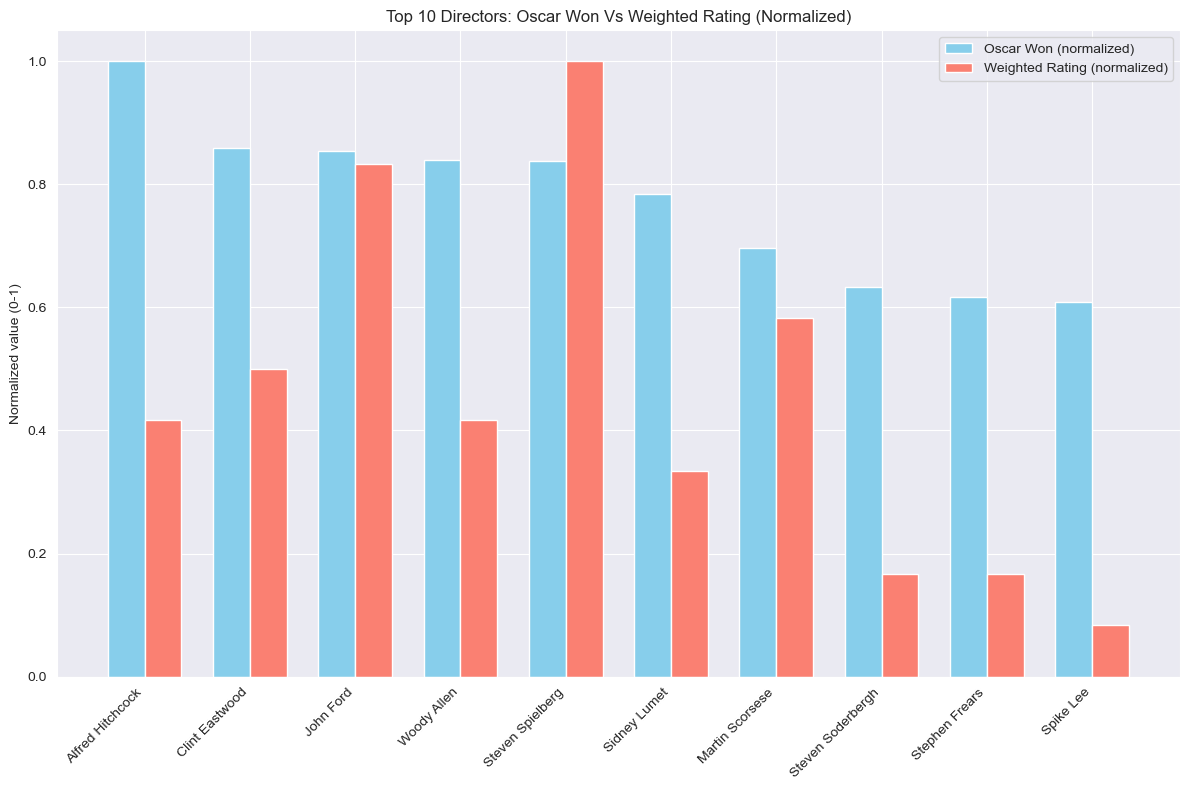

In [239]:
top_oscars = directors_stats.sort_values(by='oscars_won', ascending=False)
top_rating = directors_stats.sort_values(by='weighted_rating', ascending=False)

top_directors = pd.concat([top_oscars, top_rating]).drop_duplicates(subset='director')
top_directors = top_directors.sort_values(by='weighted_rating', ascending=False).head(10)

top_directors['oscars_norm'] = top_directors['oscars_won'] / top_directors['oscars_won'].max()
top_directors['rating_norm'] = top_directors['weighted_rating'] / top_directors['weighted_rating'].max()

labels = top_directors['director']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, top_directors['rating_norm'], width, label='Oscar Won (normalized)', color='skyblue')
bars2 = ax.bar(x + width/2, top_directors['oscars_norm'], width, label='Weighted Rating (normalized)', color='salmon')

ax.set_ylabel('Normalized value (0-1)')
ax.set_title('Top 10 Directors: Oscar Won Vs Weighted Rating (Normalized)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

## Analyzing Genre Preferences of the Top 10 Directors
This stacked bar chart illustrates the genre distribution of films directed by the top 10 directors in the dataset. Each bar represents a director, and the colored segments within each bar indicate the number of films they directed in each of the top 8 most common genres. This visualization allows for a quick comparison of genre diversity among directors and highlights those who specialize in specific genres versus those with a more varied portfolio. The data is based on merged information from movie metadata, genre classification, and review statistics.

In [240]:
top_director_names = top_directors['director'].tolist()

In [241]:
top_directors_movies = directors[directors['crew_member_name'].isin(top_director_names)]
top_directors_movies = top_directors_movies.merge(genres_df, on='movie_id', how='left')

<Figure size 1200x800 with 0 Axes>

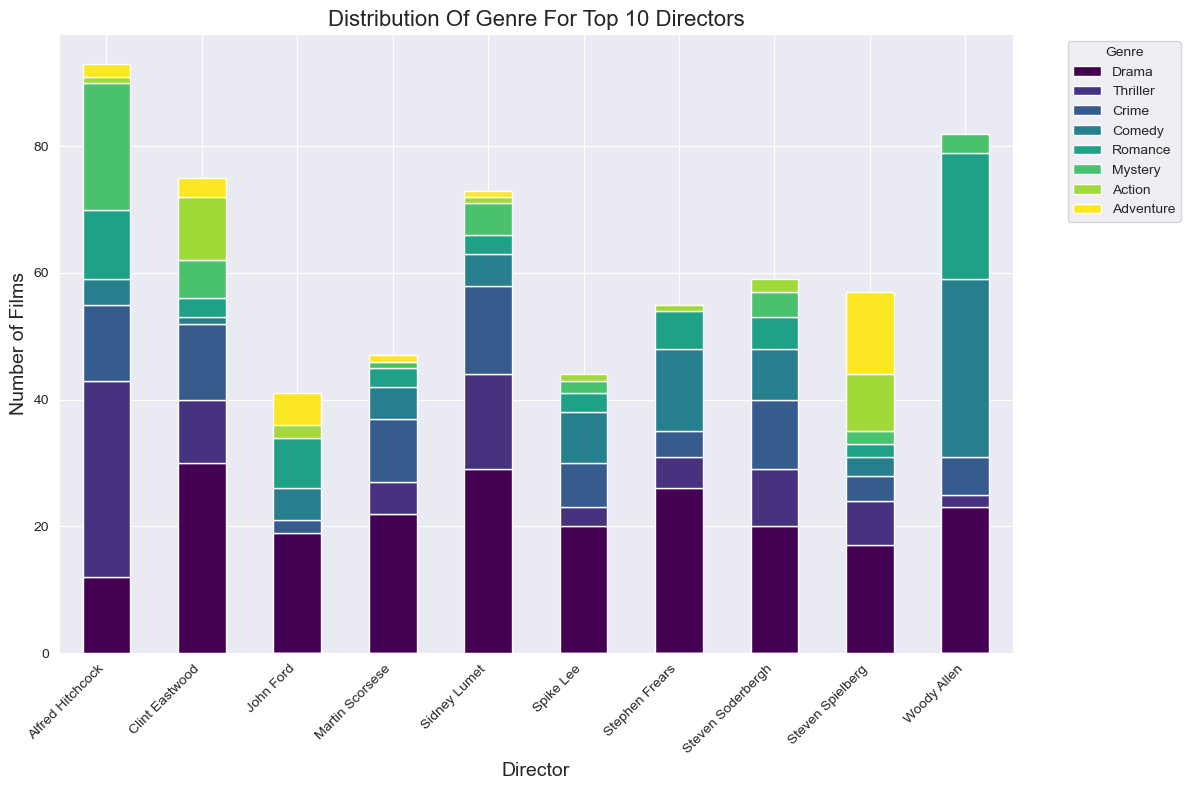

In [242]:
movies_genres = movies_df.merge(genres_df, on='movie_id', how='left')

movies_genres_reviews = movies_genres.merge(avg_reviews, left_on='movie_name', right_on='movie_title', how='left')

pivot_table = top_directors_movies.pivot_table(
    index='crew_member_name',
    columns='genre',
    values='movie_id',
    aggfunc='count',
    fill_value=0
)

top_genres = pivot_table.sum().sort_values(ascending=False).head(8).index.tolist()
pivot_filtered = pivot_table[top_genres]

plt.figure(figsize=(12, 8))
pivot_filtered.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Distribution Of Genre For Top 10 Directors', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Do Directors Deliver What Audiences Love? A Genre-Based Comparison
This radar chart compares user genre preferences with the production tendencies of top directors. The blue shape represents normalized average ratings per genre, reflecting user preferences, while the red shape shows the normalized number of films produced by top directors in each genre. By plotting both datasets on the same scale, the chart reveals alignment or mismatch between what audiences enjoy most and what directors most frequently create.


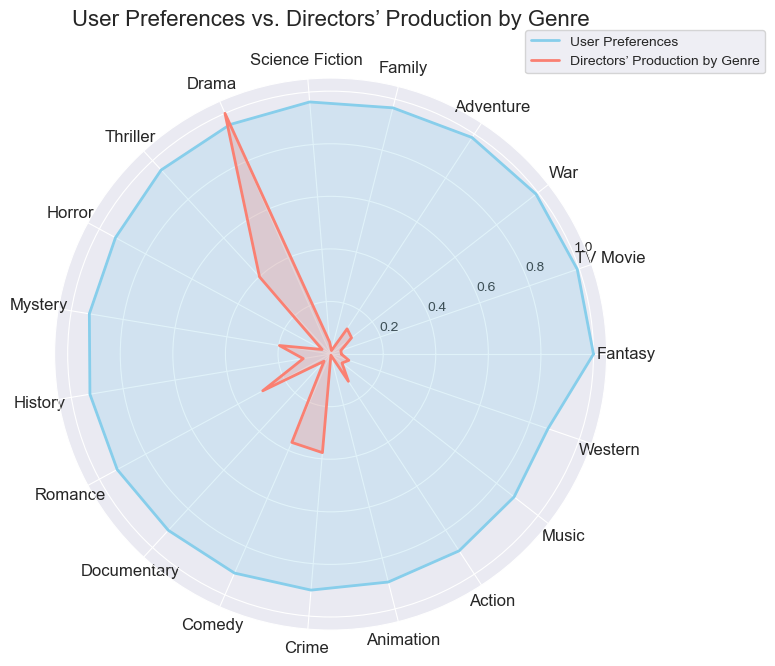

In [243]:
movies_genres_reviews = movies_genres.merge(avg_reviews, left_on='movie_name', right_on='movie_title', how='left')

genre_popularity = movies_genres_reviews.groupby('genre')['avg_rating'].mean().reset_index()
genre_popularity = genre_popularity.sort_values(by='avg_rating', ascending=False)

genres_common = set(genre_popularity['genre']).intersection(set(pivot_table.columns))

user_values = genre_popularity[genre_popularity['genre'].isin(genres_common)]['avg_rating'].values
director_genres = pivot_table[list(genres_common)].sum()

user_values = user_values / user_values.max()
director_values = director_genres.values / director_genres.max()

labels = list(genres_common)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

user_values = user_values.tolist()
user_values += user_values[:1]

director_values = director_values.tolist()
director_values += director_values[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, user_values, color='skyblue', linewidth=2, label='User Preferences')
ax.fill(angles, user_values, color='skyblue', alpha=0.25)

ax.plot(angles, director_values, color='salmon', linewidth=2, label='Directors’ Production by Genre')
ax.fill(angles, director_values, color='salmon', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)

ax.set_title('User Preferences vs. Directors’ Production by Genre', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


## Global Genre Patterns: A Heatmap of Film Production by Country
This heatmap illustrates the percentage distribution of film genres across the top 10 movie-producing countries. Each cell shows the proportion of a specific genre within a country's total film output, allowing for cross-country comparisons of genre preferences or production trends.


In [244]:
countries_df = pd.read_csv('data_cleaned/countries_cleaned.csv')

merged_df = pd.merge(countries_df, genres_df, on='movie_id', how='inner')
top_countries = merged_df.groupby('country')['movie_id'].count().sort_values(ascending=False).head(10).index
merged_top_countries = merged_df.loc[merged_df['country'].isin(top_countries)]
merged_top_countries

,movie_id,country,genre
0,1000001,UK,Comedy
1,1000001,UK,Adventure
2,1000001,USA,Comedy
3,1000001,USA,Adventure
7,1000003,USA,Science Fiction
...,...,...,...
981486,1941529,Germany,Documentary
981489,1941534,Spain,Family
981492,1941541,USA,Science Fiction
981499,1941566,USA,Crime


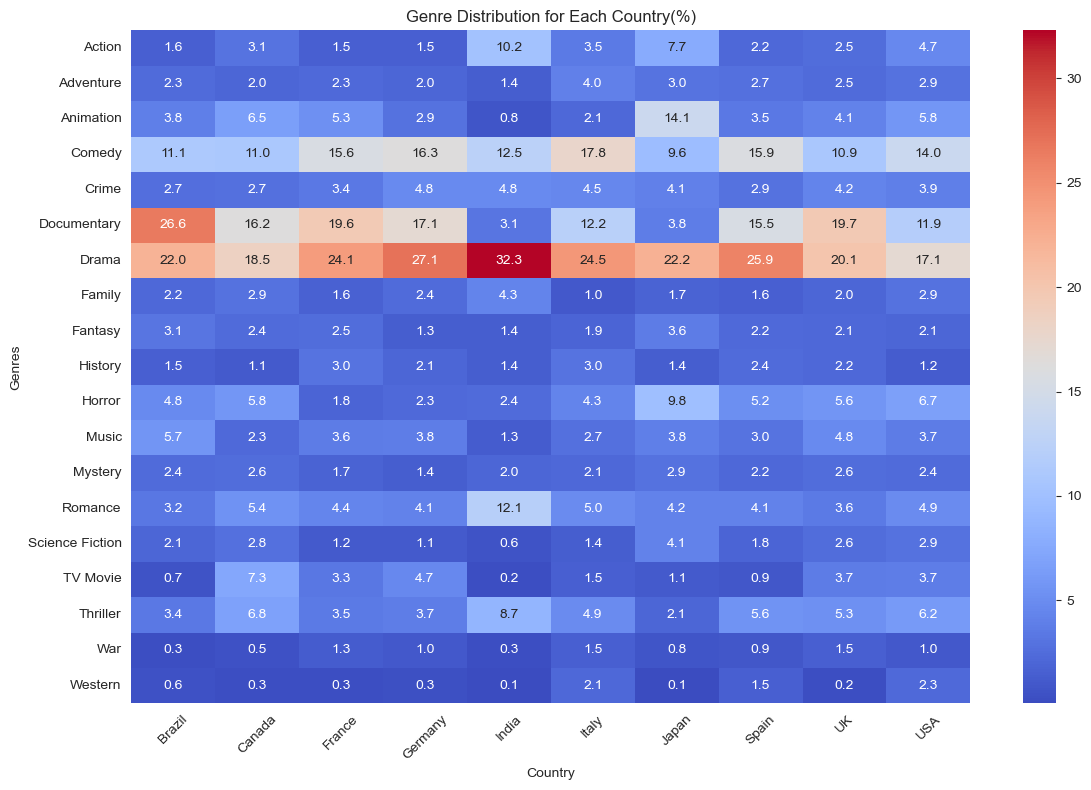

In [253]:
distribution = merged_top_countries.groupby(['country', 'genre']).size().reset_index(name='count')

distribution_matrix = distribution.groupby(['genre', 'country'])['count'].sum().unstack().fillna(0)
total_movies_per_country = distribution_matrix.sum(axis=0)
percentic_matrix = distribution_matrix.div(total_movies_per_country,axis=1) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(percentic_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Genre Distribution for Each Country(%)')
plt.ylabel('Genres')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This map visualizes the most commonly produced film genre in each country, based on the dataset. Each country is colored according to its top genre, allowing for a global view of dominant cinematic trends. This visualization highlights regional preferences or industry focuses, offering insights into how different parts of the world specialize in specific genres.


In [246]:
from IPython.display import display
import matplotlib.cm as cm
import matplotlib.colors as mcolors

world = gpd.read_file('geodata/ne_110m_admin_0_countries.shp')

country_name_map = {"USA": "United States of America", "UK": "United Kingdom", "Russian Federation": "Russia", "Bolivarian Republic of Venezuela": "Venezuela", "Congo": "Democratic Republic of the Congo"}
merged_df['country'] = merged_df['country'].replace(country_name_map)

filtered_df = merged_df[merged_df['genre'].str.lower() != 'drama']

genre_counts = filtered_df.groupby(['country', 'genre']).size().reset_index(name='count')
top_genres = genre_counts.loc[genre_counts.groupby('country')['count'].idxmax()].reset_index(drop=True)
top_genres

,country,genre,count
0,Afghanistan,Documentary,99
1,Albania,War,60
2,Algeria,Documentary,150
3,American Samoa,Comedy,2
4,Andorra,Thriller,5
...,...,...,...
242,Western Sahara,Documentary,3
243,Yemen,Documentary,14
244,Yugoslavia,Documentary,487
245,Zambia,Documentary,19


In [247]:
def style_function(feature):
    genre = feature['properties'].get('genre')
    color = genre_colors.get(genre, 'lightgray')
    return {
        'fillOpacity': 0.7,
        'weight': 0.3,
        'fillColor': color,
        'color':'black'
    }

In [248]:
merged_map = world.merge(top_genres, left_on='ADMIN', right_on='country', how='left')

unique_genres = top_genres['genre'].unique()
cmap = cm.get_cmap('Set3', len(unique_genres))
genre_colors = {genre: mcolors.to_hex(cmap(i)) for i, genre in enumerate(unique_genres)}

m = folium.Map(location=[20, 0], zoom_start=2)

folium.GeoJson(
    merged_map,
    name='Most Common Genre (excluding Drama)',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["ADMIN", "genre"], aliases=["Country", "Genre"])
).add_to(m)

display(m)

C:\Users\Stella\AppData\Local\Temp\ipykernel_13552\336266602.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', len(unique_genres))


## Correspondence between Top Directors and Oscar-Winning Actors
In this section we analyze whether the actors who have won the most Oscars have worked with the directors most appreciated by critics. This analysis allows us to understand whether there is a correlation between directorial and acting talent in determining a film's success.

In [249]:
actors_df = pd.read_csv('data_cleaned/actors_cleaned.csv')

In [250]:
actors_data = actors_df.merge(movies_data[['movie_id', 'avg_rating', 'oscars_won']], on='movie_id', how='inner')

In [251]:
acting_categories = ['ACTOR', 'ACTRESS', 'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE',
                    'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE']

acting_oscars = oscar_awards_df[
    (oscar_awards_df['winner'] == True) &
    (oscar_awards_df['category'].str.upper().isin([cat.upper() for cat in acting_categories]))
]

actor_oscars = acting_oscars.groupby('name')['winner'].count().reset_index()
actor_oscars.columns = ['actor_name', 'oscars_count']
actor_oscars = actor_oscars.sort_values(by='oscars_count', ascending=False)

top_oscar_actors = actor_oscars.head(10)

print("Top 10 actors with the most Oscars:")
display(top_oscar_actors)


Top 10 actors with the most Oscars:


,actor_name,oscars_count
183,Katharine Hepburn,4
128,Ingrid Bergman,3
89,Frances McDormand,3
307,Walter Brennan,3
132,Jack Nicholson,3
227,Meryl Streep,3
46,Christoph Waltz,2
145,Jason Robards,2
76,Elizabeth Taylor,2
36,Cate Blanchett,2


## Visualization of Collaborations Between Top Actors and Directors
This heatmap illustrates the collaborations between the top 10 Oscar-winning actors and the top 10 directors based on weighted rating. The size of the points represents the number of collaborations, while the color indicates the average rating of the movies in which they worked together.



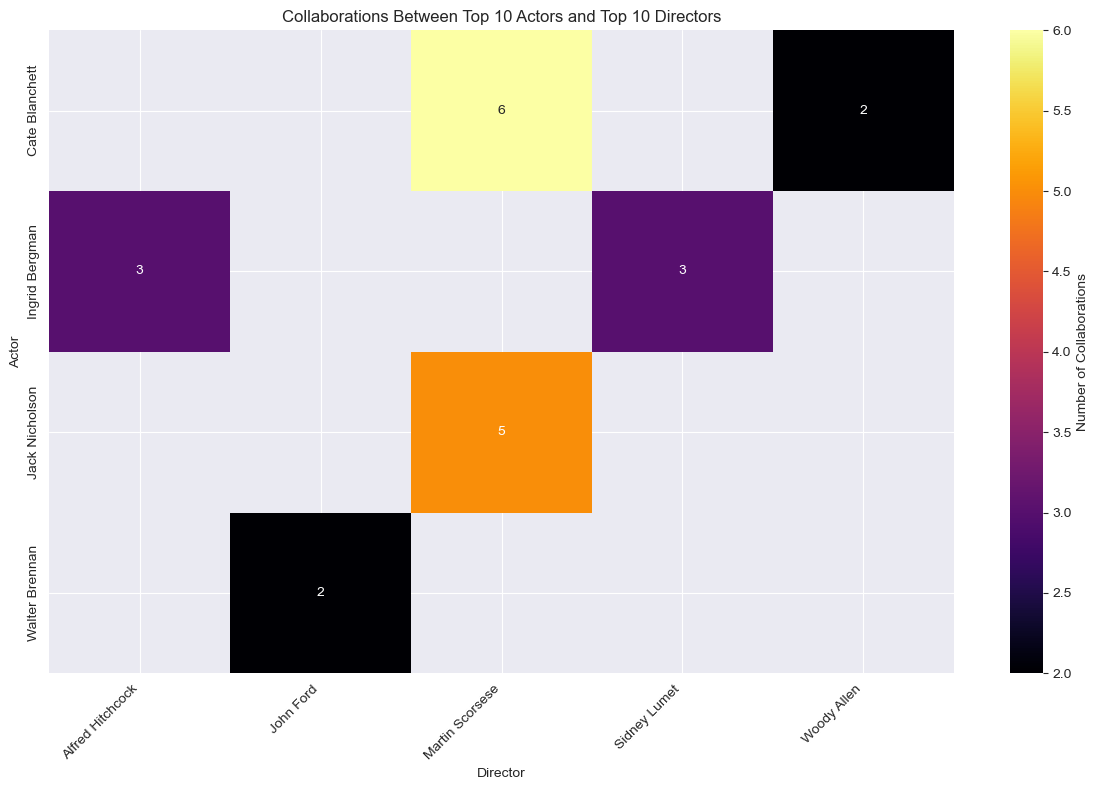

In [252]:
top_actor_names = top_oscar_actors['actor_name'].tolist()

top_director_names = top_directors['director'].tolist()

collab = actors_data.merge(directors[['movie_id', 'crew_member_name']], on='movie_id', how='inner')

collab_filtered = collab[collab['actor_name'].isin(top_actor_names) & collab['crew_member_name'].isin(top_director_names)]

collab_summary = collab_filtered.groupby(['actor_name', 'crew_member_name']).agg({
    'movie_id': 'count',
    'avg_rating': 'mean'
}).reset_index().rename(columns={'movie_id': 'collaboration_count'})

pivot_table = collab_summary.pivot(index='actor_name', columns='crew_member_name', values='collaboration_count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="inferno", cbar_kws={'label': 'Number of Collaborations'})
plt.title("Collaborations Between Top 10 Actors and Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Actor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

And for the actresses? How it works? We try to figured that out in the next visualization!